## The python toolbox
#### Some issues you could easily run into doing data wrangling

#### Two kinds of 'none'

- The first kind:

```python
NaN
```

means 'not a number'

### What happens when we load this file? (notice gaps)
#### e.g. first row value for 'gdp_us_billions' 

<img src="GenderStatsExcel.png">

In [1]:
import pandas as pd
import numpy as np

gender_stats = pd.read_csv("gender_stats.csv")
gender_stats[0:10]

,country_name,country_code,fert_rate,gdp_us_billion,health_exp_per_cap,health_exp_pub,prim_ed_girls,mat_mort_ratio,population
0,Aruba,ABW,1.66325,NaN,NaN,NaN,48.721939,NaN,0.103744
1,Afghanistan,AFG,4.95450,19.961015,161.138034,2.834598,40.109708,444.00,32.715838
2,Angola,AGO,6.12300,111.936542,254.747970,2.447546,NaN,501.25,26.937545
3,Albania,ALB,1.76925,12.327586,574.202694,2.836021,47.201082,29.25,2.888280
4,Andorra,AND,NaN,3.197538,4421.224933,7.260281,47.123345,NaN,0.079547
5,United Arab Emirates,ARE,1.79300,375.027082,2202.407569,2.581168,48.789260,6.00,9.080299
6,Argentina,ARG,2.32800,550.980968,1148.256142,2.782216,48.915810,53.75,42.976675
7,Armenia,ARM,1.54550,10.885362,348.663884,1.916016,46.782180,27.25,2.904683
8,American Samoa,ASM,NaN,0.640500,NaN,NaN,NaN,NaN,0.055422
9,Antigua and Barbuda,ATG,2.08200,1.298213,1152.493656,3.676514,48.291463,NaN,0.098872


### NaN stands for 'Not A Number'

These are missing values

#### You often want to remove lines with missing values 

In [2]:
# How to remove missing values

# make a boolean expression
# NOTE -- this is true when 'health_exp_per_cap' value is NaN
missing_health_exp = np.isnan(np.array(gender_stats['health_exp_per_cap']))
print(missing_health_exp[0:10])
not_missing = ~missing_health_exp # the '~' is the logical 'not'
                                  # 'not' reverses True/False
print(not_missing[0:10]) 

[ True False False False False False False False  True False]
[False  True  True  True  True  True  True  True False  True]


In [3]:
# 'not' reverses true/false - 
# we want to keep values that are _not_ NaN
gender_stats_no_missing_health_exp = gender_stats[not_missing] 
# boolean expression on its own like this applies to the whole row
# if TRUE - keep the row
# if FALSE - throw out the row
gender_stats_no_missing_health_exp[0:10]

,country_name,country_code,fert_rate,gdp_us_billion,health_exp_per_cap,health_exp_pub,prim_ed_girls,mat_mort_ratio,population
1,Afghanistan,AFG,4.95450,19.961015,161.138034,2.834598,40.109708,444.00,32.715838
2,Angola,AGO,6.12300,111.936542,254.747970,2.447546,NaN,501.25,26.937545
3,Albania,ALB,1.76925,12.327586,574.202694,2.836021,47.201082,29.25,2.888280
4,Andorra,AND,NaN,3.197538,4421.224933,7.260281,47.123345,NaN,0.079547
5,United Arab Emirates,ARE,1.79300,375.027082,2202.407569,2.581168,48.789260,6.00,9.080299
6,Argentina,ARG,2.32800,550.980968,1148.256142,2.782216,48.915810,53.75,42.976675
7,Armenia,ARM,1.54550,10.885362,348.663884,1.916016,46.782180,27.25,2.904683
9,Antigua and Barbuda,ATG,2.08200,1.298213,1152.493656,3.676514,48.291463,NaN,0.098872
10,Australia,AUS,1.86150,1422.994116,4256.058988,6.292381,48.576707,6.00,23.444560
11,Austria,AUT,1.45500,407.494276,4930.298893,8.504276,48.556078,4.00,8.566294


NOTE:  We removed rows where `health_exp_per_cap` were NaN.  There are still other columns with NaN values (see `fert_rate`).  If we wanted to relate fertility rates to health expenditure per capita we would want to eliminate rows with `fert_rate = NaN` too.

#### A potential 'gotcha'!

#### The function 'len' returns the count of _all_ the values - including 'NaN'

In [4]:
health_exp_per_cap = gender_stats['health_exp_per_cap']
first_ten_health_exp = health_exp_per_cap[0:10]
first_ten_health_exp

0            NaN
1     161.138034
2     254.747970
3     574.202694
4    4421.224933
5    2202.407569
6    1148.256142
7     348.663884
8            NaN
9    1152.493656
Name: health_exp_per_cap, dtype: float64

In [5]:
len(first_ten_health_exp)

10

In [6]:
type(first_ten_health_exp)

pandas.core.series.Series

### The array method 'count' returns the count of values that are NOT 'NaN'

In [7]:
# notice this is a method called on the np.array first_ten_health_exp
# [array name](dot)[method name]

first_ten_health_exp.count()

8

### The second type of nothing = `None`

In [8]:
test = None
print(test)

None


In [9]:
# boolean expression to test for None
test is None

True

### 'None' is the default return value for a function
### If you don't return a value, 'None' will be returned

In [10]:
# Normal function with a return value

def add_two(value1,value2):
    sum_value = value1 + value2
    return(sum_value)

sum_value = add_two(4,5)
print(sum_value)

9


In [11]:
# function without a return value

def print_me(print_this_value):
    print(print_this_value)
    
return_value = print_me("Hello world")
print(return_value)

Hello world
None


### Some common plotting functions

We have started doing more plotting - here are some common plotting functions

```python
plt.hist(array of numbers) # plot a histogram (distribution)
```

```python
plt.scatter(x values, y values) # plot points -- make a scatterplot (one point for each x,y pair)
```

```python
plt.plot(x values, y values) # plot a line connecting x,y points (a jagged line, not a fitted line)
```

```python
plt.axvline(x position) # plot a vertical line at the given position
```

### Common labelling functions

```python
plt.xlabel('x axis label') # label x axis
```

```python
plt.ylabel('y axis label') # label y axis
```

```python
plt.title('plot title') # plot a title above the plot
```

```python
plt.legend() # adds legend if you have labelled values
```

### Labelling is very important - don't neglect it

In [12]:
# Load the library for plotting, name it 'plt'
import matplotlib.pyplot as plt
# Display plots inside the notebook.
%matplotlib inline
# Make plots look a little more fancy
plt.style.use('fivethirtyeight')

beer_data = pd.read_csv("beer_data.csv")
water_data = pd.read_csv("water_data.csv")
beer_mean = np.mean(beer_data["act_diff"])
water_mean = np.mean(water_data["act_diff"])

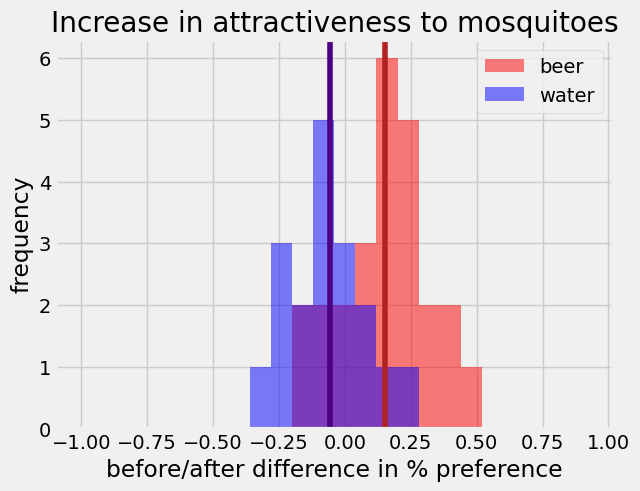

In [13]:
# Remember this?
bins = np.arange(-1,1,.08) # set up some bins for the bars in our histogram
plt.hist(beer_data["act_diff"],
         bins,
         alpha=0.5, # this is the level of transparency (0-1) - higher is less transparent
         color="red", # selects a colour for the bars
         label="beer") # here is where we add the label for the legend
plt.hist(water_data["act_diff"],
         bins,
         alpha=0.5,
         color="blue",
         label="water")
plt.axvline(beer_mean,color="firebrick")
plt.axvline(water_mean,color="indigo")
plt.xlabel("before/after difference in % preference")
plt.ylabel("frequency")
plt.title("Increase in attractiveness to mosquitoes")
plt.legend()

### Another example -- Fretility and GDP
- Do families have fewer children in high GDP countries?

Text(0.5, 1.0, 'Fertility and GDP')

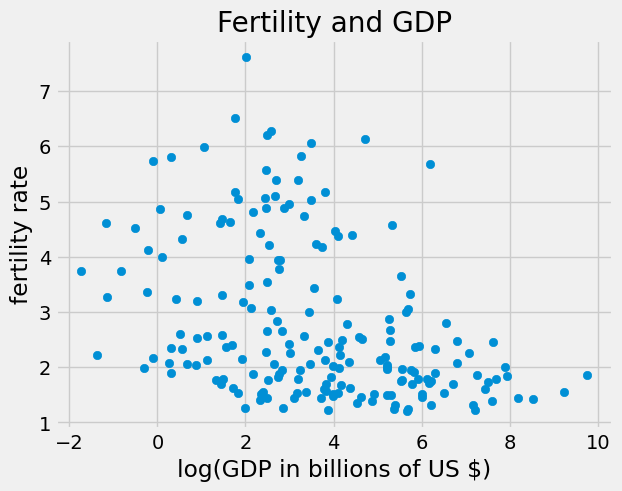

In [15]:
plt.scatter(np.log(gender_stats['gdp_us_billion']),gender_stats['fert_rate'])
plt.xlabel('log(GDP in billions of US $)')
plt.ylabel('fertility rate')
plt.title('Fertility and GDP')

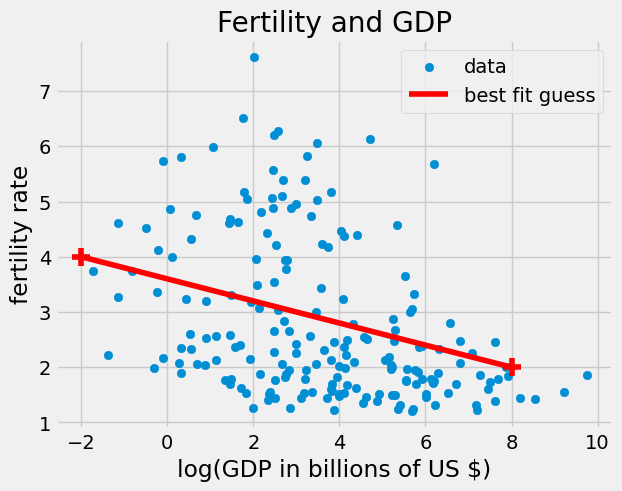

In [16]:
line_x = np.array([-2,8])
line_y = np.array([4,2])
plt.scatter(np.log(gender_stats['gdp_us_billion']),gender_stats['fert_rate'],label="data")
plt.plot(line_x,line_y,color="red",label="best fit guess") # guess at a line of best fit
plt.scatter(line_x,line_y,color="red",marker="+",s=150,) # mark endpoints of line
# This is just a GUESS.  This is not the official best fit line
# You'll be able to get the real best fit line from your simulation results

plt.xlabel('log(GDP in billions of US $)')
plt.ylabel('fertility rate')
plt.title('Fertility and GDP')
plt.legend()

## Where next?  -- Relationships between two variables 
#### (e.g. Does fertility go down as GDP increases)
## Many of you will want to look at these kinds of relationships in your projects

- You often want to know how strong a relationship is
- You often want to know how much one variable will change when there is a change in the other variable
- You can use results from looking at relationships to predict new points

### Two areas

#### 1) Assessing how strong the relationship is (correlation)

#### 2) Fitting the best line possible to a set of points (regression)

### These are related, but not exactly the same thing

- However, forget, for the moment, the technical terms 'regression' and 'correlation'.

- We want to build an intuitive understanding first.

# 1) - How strong is the relationship?

### Strongly related variables (using some made-up data)


In [ ]:
xvalues = [-2, -1, 0, 1, 2]
yvalues = [-2, -1, 0, 1, 2]
plt.plot(xvalues,yvalues,alpha=0.5)
plt.scatter(xvalues,yvalues,color="red")

# divide into quadrants
plt.axvline(0,color="green",linestyle="dashed",alpha=0.7)
plt.axhline(0,color="green",linestyle="dashed",alpha=0.7)

# label quadrants
props = dict(boxstyle='round', facecolor='white')
plt.text(-1.25,1.25,"-,+",color="purple",fontsize=20,bbox=props)
plt.text(-1.5,-.75,"-,-",color="purple",fontsize=20,bbox=props)
plt.text(0.5,1.25,"+,+",color="purple",fontsize=20,bbox=props)
plt.text(0.5,-1.25,"+,-", color="purple",fontsize=20,bbox=props)


### Multiply x and y values for each point
#### Will the number be positive?  negative?
#### Look at the quadrants and plus/minus 
- (e.g. numbers in the bottom left are '-' for X and '-' for Y)

- minus $\times$ minus = positive result
- plus $\times$ plus = positive result

Add up for all points = big positive number

## With something more like real data

<img src="pos_correlation_rectangles.png">

#### Add up rectangles (blue positive, red negative) = big positive number
#### Correlation will be a big positive number

### Strongly related - version 2

In [ ]:
xvalues = [-2, -1, 0, 1, 2]
yvalues = [2, 1, 0, -1, -2]
plt.plot(xvalues,yvalues,alpha=0.5)
plt.scatter(xvalues,yvalues,color="red")

# divide into quadrants
plt.axvline(0,color="green",linestyle="dashed",alpha=0.7)
plt.axhline(0,color="green",linestyle="dashed",alpha=0.7)

# label quadrants
props = dict(boxstyle='round', facecolor='white')
plt.text(-0.75,1.25,"-,+",color="purple",fontsize=20,bbox=props)
plt.text(-0.75,-.75,"-,-",color="purple",fontsize=20,bbox=props)
plt.text(0.5,1.25,"+,+",color="purple",fontsize=20,bbox=props)
plt.text(0.5,-1.25,"+,-", color="purple",fontsize=20,bbox=props)


### NOTICE: Multiply x and y values

- minus $\times$ plus = negative result
- plus $\times$ minus = negative result

Add up - big negative number

### With something more like real data

<img src="neg_correlation_rectangles.png">

Add up rectangles (blue positive, red negative) - big negative number

### Weakly related variables

In [ ]:
xvalues = [-2, -2, -1, -1, 0.1, 1, 1, 2, 2]
yvalues = [2, -2, -1, 1, -0.1, 1, -1, -2, 2]
plt.scatter(xvalues,yvalues,color="red")

# divide into quadrants
plt.axvline(0,color="green",linestyle="dashed",alpha=0.7)
plt.axhline(0,color="green",linestyle="dashed",alpha=0.7)

# label quadrants
props = dict(boxstyle='round', facecolor='white')
plt.text(-0.75,1.25,"-,+",color="purple",fontsize=20,bbox=props)
plt.text(-0.75,-.75,"-,-",color="purple",fontsize=20,bbox=props)
plt.text(0.5,1.25,"+,+",color="purple",fontsize=20,bbox=props)
plt.text(0.5,-1.25,"+,-", color="purple",fontsize=20,bbox=props)


### NOTICE first of all - No nice single line for these points
X shape doesn't count - an 'X' is **two** lines.
#### (This is a cloud of points, no indication of a line)
### With a cloud there is a mix of positive and negative values

Add up - positive and negative values cancel - result is near zero

### With something more like real data

<img src="no_correlation_rectangles.png">

#### Add up -- blue and red cancel, result = about 0

#### SO, one thing we can do to capture the relationship is multiply x,y values and add up -- But here's a problem:

#### We want a number on a scale we can interpret, but different x,y will have different ranges 
#### What do we do about that?

E.g.
- 100 metre dash times will be in seconds (and tenths or hundreths of a second)

- Aging values will be in years

- Ocean depths will be in 100s of metres

- Reaction times will be in milliseconds

What to do?  The range of all of these values will be different

- What if we want to correlate reaction times with age? (very different scales)

- What if we want to correlate age with years of employment (similar scales)

- Do we want a correlation to be bigger just because the scale is bigger?  [ans: No -- the correlation should measure the **strength of the relationship,** not the size of the numbers

- **_Normalize_** the values (think percentage)
  - divide by something that tells us about the range of values in the data, but what to use?
<br>  

#### What to divide by?
- range? (max - min)
  - but what if max and min are unusual points?
  - max and min are only two points -- Can we use information from all points instead?
  - range is not a good choice </p>
<br>  

- Average distance from the mean? 
    - better - uses information from all points
    - average distance from mean = standard deviation</p>
<br>  
 
A possible measure:
    
$$\frac{(X - \bar{X})}{SD_x}$$
$$\bar{X} = mean\ of\ X$$
$$ SD_x = standard\ deviation\ of\ X$$</p><br>
    
#### Common sense translation of the formula: The formula says "how far is each X from the mean of X in standardized units?"

## All values will now be in SD units, so on a common scale
    

###  When we multiplied above, we got positive, negative or mix of values

#### NOTICE, however, in order to get values in the quadrants we saw on the plots

    - upper right: +,+
    - lower right: +,-
    - lower left: -,-
    - upper left: -,+  

The values need to be centered on 0,0 (see plot)

### What if our values are not centred on 0,0?
### What can we do? - Centering

$$Use:\ (X - \bar{X})$$

$$\bar{X}\ =\ mean\ of\ X$$

gives centred values

- Values below the mean are negative
- Values above the mean are positive
- Half of the values (roughly) will be below the mean and half above the mean

### You have just derived the correlation coefficient

There are two parts:  
1) A measure to give us plus/minus values
2) Divided by a standard deviation

#### The top part: Plus/minus - $X \times Y$ (also called the _covariance_)

$$ \frac{\sum{(X - \bar{X})}}{N-1} \times \frac{\sum{(Y - \bar{Y})}}{N-1}\ \ or: $$

$$ \frac{\sum{(X - \bar{X})}\times(Y-\bar{Y})}{N-1} $$

- For each point, multiply the X distance from the mean by the Y distance from the mean
- Take an average

#### This is the formula for the _covariance_

#### Scale X part by the SD of X
#### Scale Y part by the SD of Y

- Now distances for X and Y are both on _standardized_ scales

$$ \frac{\frac{\sum{(X - \bar{X})}}{N-1}}{SD_x}  \times \frac{\frac{\sum{(Y - \bar{Y})}}{N-1}}{SD_y} $$

### This is equal to the usual formula for the correlation

$$ \frac{\sum{((X - \bar{X})(Y-\bar{Y}))} / (N-1)}{SD_x SD_y} $$

### The correlation tells you how strong the relationship between variables is
#### or we could say (equivalently) how much of the change in X is related to a change in Y

#### This is NOT how _steep_ the line is
#### This _is_ how closely the points cluster around the line